# Abstract

Every day I pursue a small **win** in one of the areas of my life that I identify as a **priority**. For example: "prog", "travel", "sport", or "social".

In this study we will use Bayesian inference to answer the question "How likely was it for me to get a win related to priority 'Social' in 2023".

# Load the dependencies

In [9]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

%matplotlib inline

# Define some useful methods

In [3]:
def uniform(x, a, b):
    if x < a or x > b:
        return 0
    else:
        return 1/(b - a)

def binomial(k, n, p):
    if n < 0:
        return 0
    elif k < 0 or k > n:
        return 0
    elif p < 0 or p > 1:
        return 0
    else:
        return math.comb(n, k) * pow(p, k) * pow(1 - p, n - k)

def gaussian(x, mu, sigma):
    denominator = sigma*math.sqrt(2*math.pi)
    epower = -0.5*math.pow((x - mu)/sigma, 2)
    return 1/denominator * math.pow(math.e, epower)

def plot(ls, values):
    fig, ax = plt.subplots()
    ax.plot(ls, values)

# Method

From the previous exercises, we've seen that I got 163 wins related to 'Social' priority from 365 days.
Getting a win in every category is a Binomial process with unknown parameter `P` that we are going to estimate.
We'll pick a non-informative prior, `P ~ Uniform(0, 1)`.

We'll then find the posterior distribution for `P` as `f(P|data) = f(P)*p(data|P)`, normalized.

We'll use the grid approximation for all the distributions (Because we can. Basically, for practicing).

In [6]:
ls = np.linspace(-1, 2, 1000)

## Prior

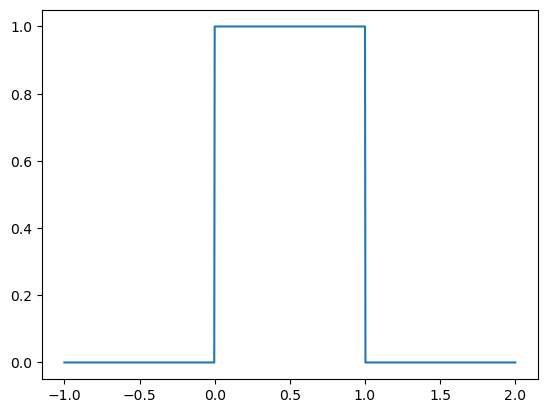

In [7]:
prior = np.array([uniform(x, 0, 1) for x in ls])
# prior = np.array([gaussian(x, 0.5, 0.2) for x in ls])
plot(ls, prior)

## Likelihood

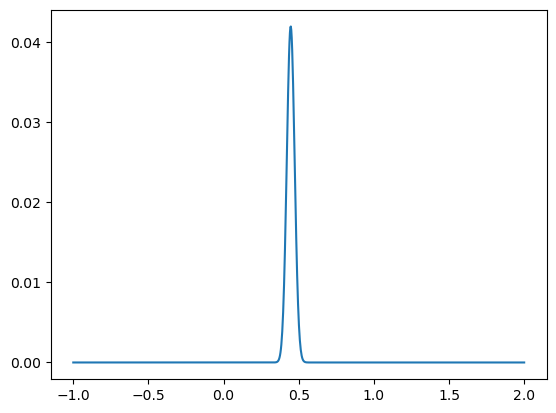

In [16]:
likelihood = np.array([binomial(163, 365, x) for x in ls])
plot(ls, likelihood)

## Posterior

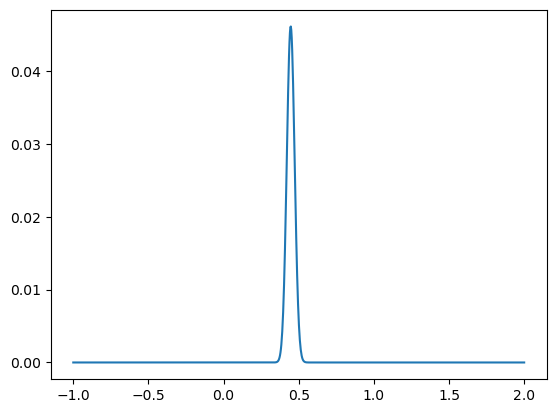

In [17]:
posterior = prior * likelihood
posterior = posterior / posterior.sum()
plot(ls, posterior)

## Point estimate

In [18]:
ls[np.argmax(posterior)]

0.44744744744744747

## Conclusion

We used Bayesian inference to find out that the probability of getting a win in a priority 'social' on any given day of 2023 was 0.45.